In [76]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

#import csv files from zillow data
sfh_data = Path("zillow data set/zillow_sfr_data.csv")
sfh_data_df = pd.read_csv(sfh_data)

#Using loc function to get the data set only for CA
ca_sfh_df = sfh_data_df.loc[sfh_data_df["State"] == "CA"]
ca_sfh_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1/31/2000,2/29/2000,...,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,225898.9148,226250.2690,...,9.595539e+05,9.455508e+05,9.303867e+05,9.236054e+05,9.244403e+05,9.312563e+05,9.437978e+05,9.606421e+05,9.775414e+05,9.915515e+05
8,54296,8,San Diego,city,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",San Diego County,242215.2808,243326.1486,...,9.967033e+05,9.911829e+05,9.892960e+05,9.932577e+05,1.001275e+06,1.012776e+06,1.027189e+06,1.042720e+06,1.058357e+06,1.070822e+06
11,33839,11,San Jose,city,CA,CA,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,342058.5013,343828.9776,...,1.354153e+06,1.337797e+06,1.319164e+06,1.309909e+06,1.311342e+06,1.321486e+06,1.341371e+06,1.367354e+06,1.395474e+06,1.420491e+06
17,20330,17,San Francisco,city,CA,CA,"San Francisco-Oakland-Berkeley, CA",San Francisco County,414006.6075,416099.6941,...,1.422032e+06,1.400134e+06,1.384346e+06,1.381217e+06,1.378607e+06,1.377092e+06,1.375268e+06,1.377256e+06,1.380090e+06,1.379777e+06
28,20288,28,Sacramento,city,CA,CA,"Sacramento-Roseville-Folsom, CA",Sacramento County,121079.1273,121410.1233,...,4.713985e+05,4.654586e+05,4.621957e+05,4.614421e+05,4.620628e+05,4.639984e+05,4.668706e+05,4.703067e+05,4.724892e+05,4.737653e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21430,12132,28683,Johannesburg,city,CA,CA,"Riverside-San Bernardino-Ontario, CA",San Bernardino County,NaN,NaN,...,1.033724e+05,1.008736e+05,9.830302e+04,9.668419e+04,9.474301e+04,9.274531e+04,9.063884e+04,8.925868e+04,8.892331e+04,8.807990e+04
21475,23633,28683,Bear Valley,city,CA,CA,NaN,Alpine County,NaN,NaN,...,5.424601e+05,5.392543e+05,5.378183e+05,5.385981e+05,5.406158e+05,5.430691e+05,5.451928e+05,5.451743e+05,5.423421e+05,5.385118e+05
21476,396499,28683,Plumas Eureka,city,CA,CA,NaN,Plumas County,NaN,NaN,...,4.208534e+05,4.204182e+05,4.214408e+05,4.229493e+05,4.249698e+05,4.271933e+05,4.285124e+05,4.298039e+05,4.299060e+05,4.291135e+05
21563,395428,28683,Little Grass Valley,city,CA,CA,NaN,Plumas County,NaN,NaN,...,3.510081e+05,3.458930e+05,3.426771e+05,3.428095e+05,3.444210e+05,3.458714e+05,3.456342e+05,3.448483e+05,3.435650e+05,3.428443e+05


In [77]:
print(ca_sfh_df.columns)

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '1/31/2000', '2/29/2000',
       ...
       '1/31/2023', '2/28/2023', '3/31/2023', '4/30/2023', '5/31/2023',
       '6/30/2023', '7/31/2023', '8/31/2023', '9/30/2023', '10/31/2023'],
      dtype='object', length=294)


In [78]:
#Delete unused and duplicated columns
ca_sfh_df = ca_sfh_df.drop(["RegionID","SizeRank","RegionType","StateName","Metro","State","CountyName",], axis=1)
#filter data set to show data from 2015 to 2021
ca_sfh_df = ca_sfh_df.drop(ca_sfh_df.loc[:,"1/31/2000":"12/31/2014"].columns, axis=1)
ca_sfh_df = ca_sfh_df.drop(ca_sfh_df.loc[:,"1/31/2022":"10/31/2023"].columns, axis=1)
ca_sfh_df = ca_sfh_df.rename(columns={"RegionName":"City"})
ca_sfh_df

,City,1/31/2015,2/28/2015,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,8/31/2015,9/30/2015,...,3/31/2021,4/30/2021,5/31/2021,6/30/2021,7/31/2021,8/31/2021,9/30/2021,10/31/2021,11/30/2021,12/31/2021
1,Los Angeles,5.291565e+05,5.310011e+05,5.303974e+05,5.297589e+05,5.298251e+05,5.311413e+05,5.305768e+05,5.277941e+05,5.230034e+05,...,8.241539e+05,8.317097e+05,8.435377e+05,8.583911e+05,8.742689e+05,8.866101e+05,8.962151e+05,9.033898e+05,9.114491e+05,9.207826e+05
8,San Diego,5.430120e+05,5.471201e+05,5.508658e+05,5.535158e+05,5.557816e+05,5.580709e+05,5.595967e+05,5.615245e+05,5.643048e+05,...,8.093091e+05,8.262945e+05,8.463738e+05,8.668922e+05,8.830033e+05,8.906363e+05,8.918994e+05,8.932483e+05,8.988465e+05,9.090539e+05
11,San Jose,7.189839e+05,7.270660e+05,7.314359e+05,7.330290e+05,7.344424e+05,7.377245e+05,7.453342e+05,7.558439e+05,7.697032e+05,...,1.167425e+06,1.182661e+06,1.202341e+06,1.224017e+06,1.242459e+06,1.255305e+06,1.264436e+06,1.273623e+06,1.287118e+06,1.307767e+06
17,San Francisco,1.017415e+06,1.034108e+06,1.050345e+06,1.065697e+06,1.081856e+06,1.098470e+06,1.113039e+06,1.126075e+06,1.139947e+06,...,1.453793e+06,1.462636e+06,1.477613e+06,1.495493e+06,1.515485e+06,1.528949e+06,1.535460e+06,1.538616e+06,1.546315e+06,1.554437e+06
28,Sacramento,2.338120e+05,2.356985e+05,2.376231e+05,2.397077e+05,2.420460e+05,2.444701e+05,2.464860e+05,2.482797e+05,2.505501e+05,...,4.146834e+05,4.232937e+05,4.320047e+05,4.401458e+05,4.472543e+05,4.519045e+05,4.549161e+05,4.572035e+05,4.603864e+05,4.644701e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21430,Johannesburg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.006894e+05,1.014570e+05,1.026472e+05,1.046968e+05,1.055486e+05,1.055045e+05,1.051379e+05,1.062747e+05,1.084588e+05,1.101245e+05
21475,Bear Valley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.652326e+05,4.752032e+05,4.867217e+05,4.992778e+05,5.106430e+05,5.182892e+05,5.232775e+05,5.268905e+05,5.325629e+05,5.369734e+05
21476,Plumas Eureka,2.309197e+05,2.303502e+05,2.296174e+05,2.289760e+05,2.292368e+05,2.305277e+05,2.321623e+05,2.341674e+05,2.364304e+05,...,3.429311e+05,3.478684e+05,3.536194e+05,3.589888e+05,3.646533e+05,3.713613e+05,3.788935e+05,3.856252e+05,3.911812e+05,3.968901e+05
21563,Little Grass Valley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
#Caluclate the mean and grab the city & Mean of the year column
years = range(2015,2022)
year_mean = []
for year in years:
    start = f"1/31/{year}"
    end = f"12/31/{year}"
    mean = ca_sfh_df.loc[:, start:end].mean(axis=1)
    year_mean.append((year, round(mean,1)))

for year, mean in year_mean:
    ca_sfh_df[str((year))] = mean
    
selected_columns = ["City"] + [str(year) for year in years]
clear_ca_sfh_df = ca_sfh_df[selected_columns]

clear_ca_sfh_df = clear_ca_sfh_df.sort_values(by="City")
clear_ca_sfh_df = clear_ca_sfh_df.reset_index(drop=True)
clear_ca_sfh_df.dropna(how='any', inplace=True)
clear_ca_sfh_df

,City,2015,2016,2017,2018,2019,2020,2021
0,Acampo,411290.3,457113.1,499479.8,549449.1,576265.3,577935.7,706673.6
1,Acton,429758.9,449873.7,483729.3,536849.0,565247.3,591931.2,698957.6
2,Adelanto,151547.4,163231.4,185646.1,215282.2,229858.4,245152.2,300593.3
3,Adin,151136.3,163947.3,175406.9,186325.1,191057.7,193622.4,229474.8
4,Agoura Hills,726644.3,729300.6,782420.1,849757.7,857486.5,897807.2,1046212.4
...,...,...,...,...,...,...,...,...
958,Yountville,867632.5,930751.6,985898.6,1040493.4,1078248.0,1120945.9,1311820.5
959,Yreka,147052.4,155893.3,163423.5,174930.9,190187.6,198080.2,233822.1
960,Yuba City,225099.8,243232.4,270577.0,295807.7,310524.3,333738.0,393197.7
961,Yucaipa,286070.9,302006.7,332697.6,369420.6,376584.5,397064.1,463536.9


In [80]:
print(clear_ca_sfh_df.columns)

Index(['City', '2015', '2016', '2017', '2018', '2019', '2020', '2021'], dtype='object')


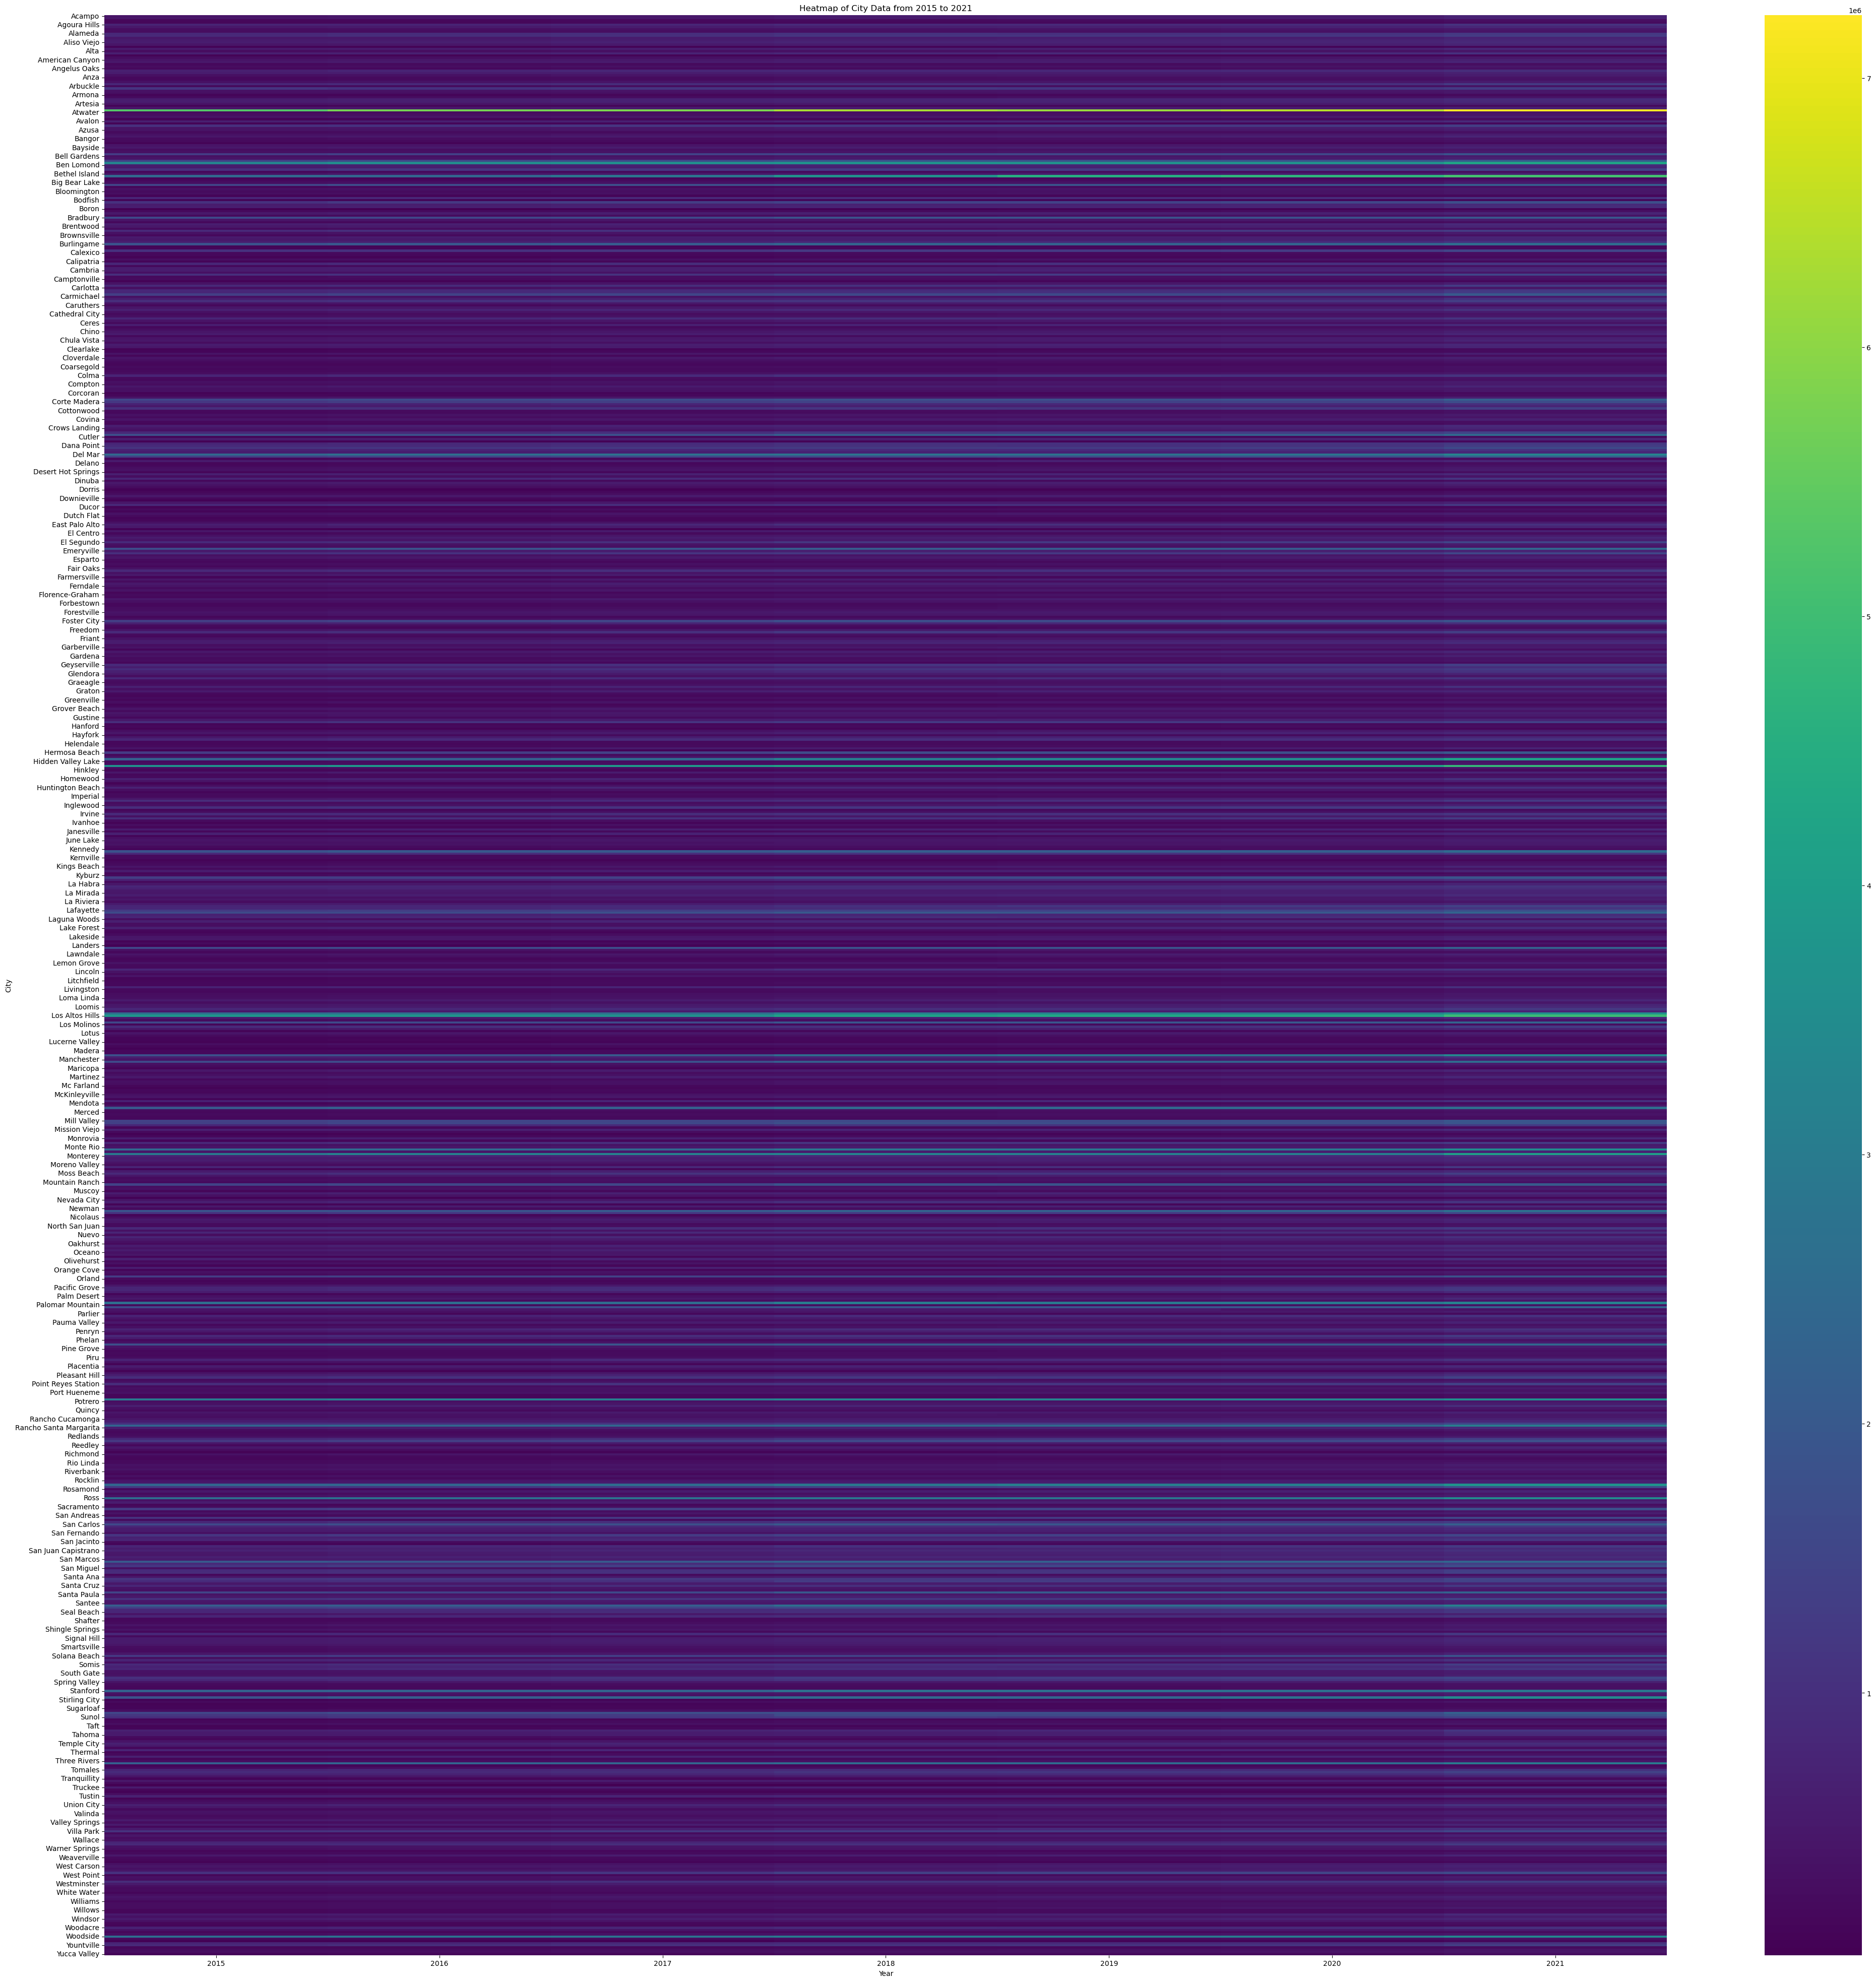

In [81]:
# Dropping non-numeric columns for the heatmap
heatmap_data = clear_ca_sfh_df.drop(columns=['City'])

# Setting the index to the city for better readability
heatmap_data.index = clear_ca_sfh_df['City']

# Creating the heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(heatmap_data, annot=False, cmap='viridis')
plt.title('Heatmap of City Data from 2015 to 2021')
plt.xlabel('Year')
plt.ylabel('City')
plt.show()

In [82]:
city_categories = [
    "Alpine", "Antioch", "Arcata", "Arroyo Grande", "Grover Beach", "Pismo Beach", "Arvin",
    "Auburn", "Avalon", "Avenal", "Bakersfield", "Barstow", "Big Bear", "Bishop", "Blythe",
    "Brawley", "Buellton", "Calexico", "Calistoga", "Camarillo", "Cambria", "Castroville", 
    "Prunedale", "Chico", "Chowchilla", "Clearlake", "Clearlake Riviera", "Cloverdale", 
    "Coalinga", "Colusa", "Concord", "Walnut Creek", "Corcoran", "Corning", "Crescent City",
    "Crestline", "Lake Arrowhead", "Davis", "Delano", "Delhi", "Desert Hot Springs", 
    "Discovery Bay", "Dixon", "Dos Palos", "Earlimart", "El Centro", "El Paso de Robles", 
    "Paso Robles", "Atascadero", "Escalon", "Eureka", "Exeter", "Fairfield", "Fallbrook", 
    "Fillmore", "Firebaugh", "Fort Bragg", "Fort Irwin", "Fortuna", "Fresno", "Galt", "Gilroy", 
    "Morgan Hill", "Gonzales", "Grass Valley", "Greenfield", "Gridley", "Guadalupe", "Gustine", 
    "Half Moon Bay", "Hanford", "Hemet", "Hidden Meadows", "Hollister", "Holtville", "Huron", 
    "Incline Village", "Indio", "Palm Desert", "Palm Springs", "Ione", "Jackson", "Joshua Tree", 
    "Kerman", "King City", "Kingsburg", "Lake Isabella", "Lake of the Pines", "Lakeport", 
    "Lamont", "Lemoore", "Lemoore Station", "Lindsay", "Live Oak", "Livermore", "Pleasanton", 
    "Dublin", "Livingston", "Lodi", "Lompoc", "Los Angeles", "Long Beach", "Anaheim", "Los Banos", 
    "Los Osos", "McFarland", "McKinleyville", "Madera", "Magalia", "Mammoth Lakes", "Manteca", 
    "Mecca", "Mendota", "Merced", "Mission Viejo", "Lake Forest", "Laguna Niguel", "Modesto", 
    "Morro Bay", "Mount Shasta", "Napa", "Needles", "Newman", "Nice", "Nipomo", "Oakdale", 
    "Orange Cove", "Orland", "Orosi", "Oroville", "Oxnard", "San Buenaventura", "Ventura", 
    "Palmdale", "Lancaster", "Parker", "Parlier", "Patterson", "Petaluma", "Placerville", 
    "Diamond Springs", "Plumas Lake", "Porterville", "Ramona", "Rancho Calaveras", "Red Bluff", 
    "Redding", "Reedley", "Dinuba", "Reno", "Ridgecrest", "Rio Vista", "Ripon", "Riverside", 
    "San Bernardino", "Rosamond", "Running Springs", "Sacramento", "St. Helena", "Salinas", 
    "San Diego", "San Diego Country Estates", "San Francisco", "Oakland", "Sanger", "San Jose", 
    "San Luis Obispo", "Santa Barbara", "Santa Clarita", "Santa Cruz", "Santa Maria", 
    "Santa Paula", "Santa Rosa", "Seaside", "Monterey", "Pacific Grove", "Sebastopol", "Selma", 
    "Shafter", "Silver Lakes", "Simi Valley", "Soledad", "Solvang", "Santa Ynez", "Sonoma", 
    "Sonora", "Twain Harte", "South Lake Tahoe", "Stockton", "Susanville", "Taft", "Tehachapi", 
    "Golden Hills", "Temecula", "Murrieta", "Menifee", "Thousand Oaks", "Tracy", "Mountain House", 
    "Truckee", "Tulare", "Turlock", "Twentynine Palms", "Twentynine Palms North", "Ukiah", 
    "Vacaville", "Vallejo", "Victorville", "Hesperia", "Apple Valley", "Visalia", "Wasco", 
    "Waterford", "Watsonville", "Williams", "Willits", "Willows", "Winters", "Woodlake", 
    "Woodland", "Wrightwood", "Yreka", "Yuba City", "Yucca Valley", "Yuma"
]

clear_ca_sfh_df["City Category"] = "Not Urban"

for index, row in clear_ca_sfh_df.iterrows():
    if row["City"] in city_categories:
        clear_ca_sfh_df.at[index, "City Category"] = "Urban"

clear_ca_sfh_df.head()


,City,2015,2016,2017,2018,2019,2020,2021,City Category
0,Acampo,411290.3,457113.1,499479.8,549449.1,576265.3,577935.7,706673.6,Not Urban
1,Acton,429758.9,449873.7,483729.3,536849.0,565247.3,591931.2,698957.6,Not Urban
2,Adelanto,151547.4,163231.4,185646.1,215282.2,229858.4,245152.2,300593.3,Not Urban
3,Adin,151136.3,163947.3,175406.9,186325.1,191057.7,193622.4,229474.8,Not Urban
4,Agoura Hills,726644.3,729300.6,782420.1,849757.7,857486.5,897807.2,1046212.4,Not Urban


In [83]:
# Calculate the mean for each year for 'Urban' cities
urban_df = clear_ca_sfh_df[clear_ca_sfh_df['City Category'] == 'Urban']
urban_means = urban_df.loc[:, '2015':'2021'].mean()

# Calculate the mean for each year for 'Not Urban' cities
nurban_df = clear_ca_sfh_df[clear_ca_sfh_df['City Category'] == 'Not Urban']
nurban_means = nurban_df.loc[:, '2015':'2021'].mean()

urban_means = round(urban_means, 0)
nurban_means = round(nurban_means, 0)

mean_df = pd.DataFrame({
    "Urban": urban_means,
    "Not Urban": nurban_means
})
mean_df = mean_df.reset_index()
mean_df.rename(columns={'index': 'Year'}, inplace=True)

mean_df

,Year,Urban,Not Urban
0,2015,340089.0,523667.0
1,2016,366129.0,555101.0
2,2017,393565.0,591639.0
3,2018,425486.0,650372.0
4,2019,437723.0,663216.0
5,2020,456069.0,686207.0
6,2021,533219.0,796717.0


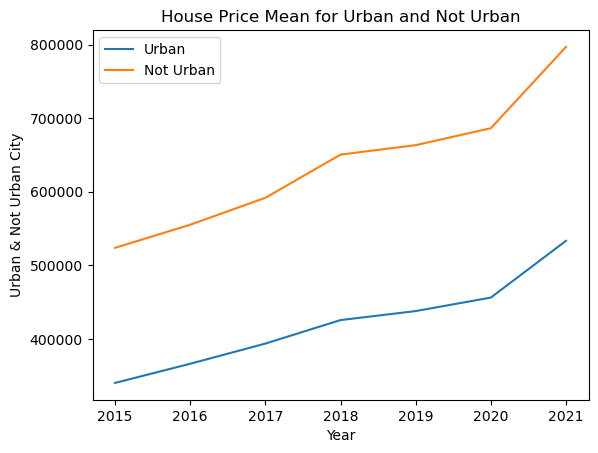

In [84]:
mean_df.plot(kind="line", x='Year', y=["Urban", "Not Urban"], title="House Price Mean for Urban and Not Urban")
plt.xlabel("Year")
plt.ylabel("Urban & Not Urban City")
plt.show()